# Mathematical Model of a Risk-Adjusted Bonding Curve

The design paradigm employed by agents in this system is that of online learning, where agents make decisions based on information obtained sequentially over event execution.

## Notations

| Notation | Description |
| :-: | :- |
| $R$ | Bonding curve Reserve|
| $S$ | Total token Supply |
| $\rho$ | Reserve ratio |
| $\kappa$ | Curvature of bonding curve|
| $C$ | Impact payers' payout commitment |
| $\Omega$ | An agent's private belief of the likelihood of project success |
| $\alpha$ | The system's approximation of the likelihood of project success |
| $P$ | Token price |
| $Q_{0}$ | Claims on payouts conditioned on $ 0$ |
| $Q_{1}$ | Claims on payouts conditioned on $1$ |
| $S_{0}$ | Tokens bonded to attest that $0$ |
| $S_{1}$ | Tokens bonded to attest that $ 1$|
| $O$ | Total outcome payout at the Settlement Phase |

## System Description
### State variables
The overall state of the system can be described using the following state variables $$R, S, \kappa, \rho, P_t, \alpha, Q_{1}, Q_{0}, S_{1}, S_{=0}$$


##### Reserve
The Reserve $R \in \mathbb{R}_{++}$ is defined as the total amount of bond tokens bonded as reserve funds under the bonding curve.

##### Supply
The Supply $S \in \mathbb{R}_{++}$ is defined as the total amount of impact tokens issued by the bonding curve contract.

##### Bonding Curve Curvature
The state variable $\kappa$ describes the curvature of the bonding curve.

##### Reserve Ratio
The Reserve Ratio $\rho \in [0, 1]$ is determined by the bonding curve's curvature $\kappa$, and is given by $$ \rho = 1/\kappa$$

##### Price
The Price $P$ is the price of a bond token and is dependent on the slope of the bonding curve, given by $$P = \kappa * \frac{R}{S}$$

As $\rho = \frac{1}{\kappa}$, we have $$P = \frac{R}{\rho \cdot S}$$

##### Alpha
The Alpha $\alpha \in [0,1]$ at time $t$ is the system's conjecture of the likelihood of success of the bond, represented normalized such that $\alpha = 0$ indicates that the project is estimated to fail, and $\alpha = 1$ indicates the highest likelhood of success. 

We consider $\alpha \in [0,1]$ to be an estimator of $\Omega$ that is learned from the Attestation Mechanism.

##### Claim on Conditioned Payout
The state variable $Q \in \mathbb{R}_{+}$ is defined as the number of claims on payouts conditioned on an attestation, which is either an attestation that $\Omega=0$ for $Q_{0}$ claims, or that $\Omega=0$ for $Q_{0}$ claims.

### Parameters 
The following parameters are set during Initialization Phase $$C$$

The outcome payers' commitment $C \in \mathbb{R}_{+}$ is set during the Initialization Phase. The bond terms set during Initialization outline all $(C, \Omega)$ pairs, and remain constant through the following phases. $C$ is known to all agents after the Initialization phase. 

### Outcomes
The following outcomes are obtained during the Settlement Consideration Pause Phase $$\Omega$$


The outcome of the Execution phase, which includes the value of $\Omega$ is known to all agents only during the Settlement Consideration Pause Phase.

## Phases
### Initialization
During Initialization, none of the supply tokens are bonded yet. So the total token supply available during Initialization is $$S_{i} = S_{free}$$

Consider that bonding curve curvature $\kappa=2$, which gives $\rho = \frac{1}{2}$. 

This implies that half of the funds were liberated initially to directly contribute towards the project. Since funds directly contributed towards project is given by $(1-\rho)R$.

Agents involved in the Initilization Phase such as ProjectOwners are able to purchase tokens at a discounted effective price before project launch. This is given by $$P_{i} = \frac{R_i}{S_i}$$

#### Initialization conditions
- Set $C$
- Set $(C, \Omega)$ pairs, as part of project terms
- Set $\alpha$ state variable to indicate an estimate of the likelihood of success of the bond at the start $$\alpha \in [0,1]$$
- Initialize ProjectTime and ClaimsSubmitted state variables $$p \overset{set}{=} 0 \qquad \space c \overset{set}{=} 0$$
- Set ProjectTime threshold $p_{lim}$, ClaimsSubmitted threshold $c_{lim}$, and Alpha threshold $\alpha_{lim}$ such that $$p_{lim} \in \mathbb{Z}_{++} \qquad c_{lim} \in \mathbb{Z}_{+} \qquad \alpha_{lim} \in [0,1]$$
- Set bounds on reserve ratio  $\rho$ to ensure that the payout conservation function holds $$\rho \in [\rho_{min}, \rho_{max}]$$

### Execution
During the live Execution Phase, the three first order mechanisms form the primary activity taking place in the system:
1. Bond-to-mint: Agents can mint impact or supply tokens in exchange for their bond or reserve tokens.
2. Burn-to-withdraw: Agents can trade away their impact or supply tokens to obtain bond or reserve tokens.
3. Attestation: Agents can bond supply tokens $S$ to Attest their belief of the bond's success or failure, obtaining claims $Q$. 

In the bond-to-mint and burn-to-withdraw mechanisms, the price of a bond token is given by $$P = \kappa\frac{R}{S}$$

> Note: As the curvature of the bonding curve $\kappa$ is a function of $\alpha$, if there is no Attestation activity on the system, then the reserve ratio $\rho$ is invariant. Note that $\kappa=\frac{1}{\rho}$.

### Settlement

#### Settlement conditions
For successful settlement, $$p \geq p_{lim}$$ $$c \geq c_{lim}$$ $$\alpha \geq \alpha_{lim}$$

The total payout $O$ to be paid by the OutcomesPayer to project participants is given by $$ O = \alpha \cdot C + \rho(\alpha) \cdot R $$ 

The payout $\Theta_a$ of an agent comprises of their share of payout corresponding to their holdings of $s_{free}$, $s_1$ and $s_0$. 
$$\Theta_a = \frac{s_{free}}{s} (\alpha_t C+R) + \alpha_t \frac{q_1}{Q_1} \frac{s_1}{s} (C+R) + (1-\alpha_t) \frac{q_0}{Q_0} \frac{s_0}{s} (R)$$


## First Tier Mechanisms

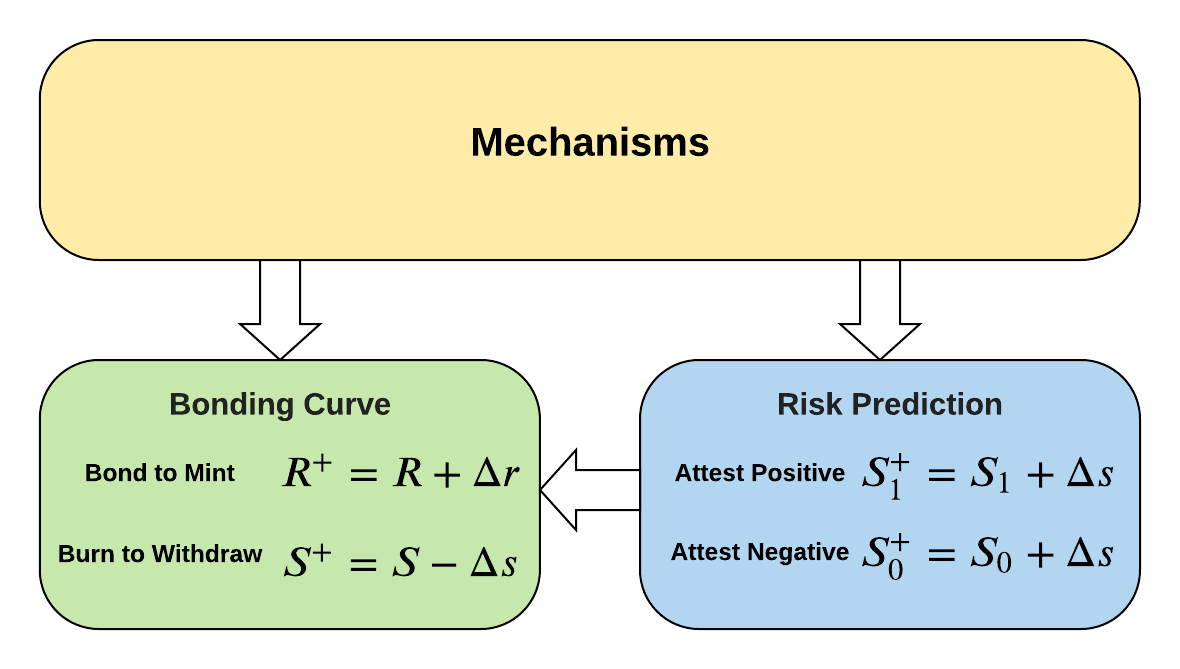

In [1]:
# ![image](img/mechanisms.png)

# For displaying image files
from IPython.display import Image
Image(filename='img/mechanisms_v2.png')


### Bond-to-Mint
The **bond-to-mint** mechanism mints impact tokens in exchange of bond tokens through an agent’s action $u_{a, t}$ . The agent’s action represents a transaction to transfer $\Delta R_t := r_{a,t} - r_{a, t+1} \geq 0$ quantity of bond tokens into the bonding curve system. Quantity $\Delta R_t$ of bond tokens are transferred into the bonding curve, resulting in

System state $x_{t+1}$

**System Reserve** $R_{t+1} = R_{t} + \Delta R_t$

**System Supply** $S_{t+1} = \sqrt[\kappa]{V_0(R_t + \Delta R_t)}$

**System Price** $P_{t+1} = \frac{R_t + \Delta R_t}{\sqrt[\kappa]{V_0(R_t + \Delta R_t)}}$

**System Alpha** $\alpha_{t+1} = \alpha_t$

Agent-level state $\hat x_{t+1}$

**Agent's reserve tokens** $r_{a, t+1} = r_t - \Delta R_t$

**Agent's supply tokens** $s_{a, t+1} = s_{a,t} + \sqrt[\kappa]{V_0(R_t + \Delta R_t)}$

**Agent's price belief** $p_{a, t+1} = g_a(x_{t+1}, \epsilon)$

**Agent's alpha belief** $\alpha_{a, t+1} = \alpha_{a,t} = \Omega_{t+1}$

### Burn-to-Withdraw

The **burn-to-withdraw** mechanism removes impact tokens to redeem bond tokens through an agent’s action $u_{a, t}$ . The agent’s action represents a transaction to remove $\Delta S_t := s_{a, t
} - s_{a, t+1} \leq 0$ quantity of impact tokens from the bonding curve system. Quantity $\Delta S_t$ of impact tokens are removed from the bonding curve, resulting in

System state $x_{t+1}$ 

**System Reserve**  $R_{t+1} = \frac{(S_t + \Delta S_t)^{\kappa}}{V_0}$

**System Supply** $S_{t+1} = S_t + \Delta S_t$

**System Price** $P_{t+1} = \frac{\kappa(S_t + \Delta S_t)^{\kappa}}{V_0(S_t + \Delta S_t)}$

**System Alpha** $\alpha_{t+1} = \alpha_t$

Agent-level state $\hat x_{t+1}$ 

**Agent's reserve tokens** $r_{a, t+1} = r_{a,t} + R_t - \frac{(S_t + \Delta S_t)^{\kappa}}{V_0}$

**Agent's supply tokens** $s_{a, t+1} = s_{a,t} + \Delta S_t$

**Agent's price belief** $p_{a, t+1} = g_a(x_{t+1}, \epsilon)$

**Agent's alpha belief** $\alpha_{a, t+1} = \alpha_{a,t} = \Omega_{t+1}$

### Attestation

When an agent makes an attestation, they bet on the project's likelihood of success based on their belief. An agent chooses to Attest only if their private belief of $\alpha$ is different from the true current $\alpha$ of the system. 

At a given time $t$ an agent can either
- Attest that $\Omega = 1$, to bet on that the project will succeed
- Attest that $\Omega = 0$, to bet that the project will not succeed

Agents bond their supply tokens $S$ to obtain attestations $Q_{1}$ or $Q_{0}$. Bonded supply tokens $S_{\Omega=1}$ or $S_{\Omega=0}$ cannot be used in trading, i.e bond or burn mechanisms. 

The **attestation** mechanism bonds an agent's supply tokens $S$ to mint claims $Q$ through an agent's action $u_{a,t}$. The agent's action represents a transaction to bond $\Delta S_t := s_{a,t} - s_{a, t+1}$ quantity of supply tokens to the system. 

If the agent attests positively, i.e ($\Omega = 1$), we have 

System state $x_{t+1}$ for positive attestation 

**System Supply** $S_{t+1} = S_t - \Delta S_t$  

**System Supply bonded to positive attestations** $S_{t,\Omega=1} = S_{t,\Omega=1} + \Delta S_t$

**System Positive Attestations** $Q_{1, t+1} = Q_{1, t} + \Delta Q_t$

**System Alpha** inc

Agent-level state $\hat x_{t+1}$ for positive attestation

**Agent's supply tokens** $s_{a, t+1} = s_{a,t} - \Delta S_t$

**Agent's positive attestations** $q_{1, t+1} = q_{1, t} + \Delta Q_{t}$

**Agent's alpha belief** 

<br/>

If the agent attests negatively, i.e ($\Omega = 0$), we have 

System state $x_{t+1}$ for negative attestation 

**System Supply** $S_{t+1} = S_t - \Delta S_t$ 

**System Supply bonded to negative attestations** $S_{t,\Omega=1} = S_{t,\Omega=1} + \Delta S_t$

**System Negative Attestations** $Q_{0, t+1} = Q_{0, t} + \Delta Q_t$

**System Alpha** dec

Agent-level state $\hat x_{t+1}$ for negative attestation

**Agent's supply tokens** dec $s_{a, t+1} = s_{a,t} - \Delta S_t$

**Agent's negative attestations** $q_{0, t+1} = q_{0, t} + \Delta Q_{t}$

**Agent's alpha belief** 

<br/>

The Attestation mechanism is a bond-only mechanism, meaning that it does not allow agents to *unattest*, or undo an Attestation. 

The order in which Attestations are placed matters due to diminishing returns associated with attesting later.  

#### Outcome case: $\Omega = 1$

For the outcome case of claims towards attesting that $\Omega=1$,

| Quantity | Description |
| :-: | :- |
| $C + R$ | Total tokens in reserve|
| $S_{\Omega=1}$ | Tokens used to Attest that $\Omega=1$|
| $S_{free}$| Tokens not used to Attest|
| $Q_{\Omega=1}$ | Claims on payouts conditioned on $\Omega = 1$|
| $Q_i$ | Claims on payouts conditioned on $\Omega = 1$ held by an individual agent $i$|

The total share of outcome payment that will be paid out to all $S_{\Omega=1}$ holders is $$O_{S_{\Omega = 1}} = \frac{S_{\Omega=1} + S_{\Omega=0}}{S}$$

From here, we derive the share of outcome payment that will be paid out to an individual $S_{\Omega=1}$ holder, $i$ as $$\Phi_{S_{\Omega = 1}} = \frac{S_{\Omega=1} + S_{\Omega=0}}{S} \cdot \frac{Q_i}{Q_{\Omega=1}} \cdot (C+R)$$

The total share of outcome payment that will be paid out to all $S_{free}$ holders is $$O_{S_{free}} =\frac{S_{free}}{S}$$

Deriving the the share of outcome payment that will be paid out to an *individual* $S_{free}$ holder, $i$ as $$\Phi_{S_{free}} = \frac{S_{free}}{S} \cdot \frac{S_i}{S_{free}} \cdot (C+R)$$

Simplifying, $$\Phi_{S_{free}} = \frac{S_{i}}{S} \cdot (C+R)$$

#### Outcome case: $\Omega = 0$
For the outcome case of claims towards attesting that $\Omega=0$,

| Quantity | Description |
| :-: | :- |
| $R$ | Total tokens in reserve|
| $S_{0}$ | Tokens used to Attest that $\Omega=0$|
| $S_{free}$| Tokens not used to Attest|
| $Q_{0}$ | Claims on payouts conditioned on $\Omega = 0$|
| $Q_i$ | Claims on payouts conditioned on $\Omega = 0$ held by an individual agent $i$|

The total share of outcome payment that will be paid out to all $S_{0}$ holders is $$O_{S_{ 0}} = \frac{S_{1} + S_{0}}{S}$$

From here, we derive the share of outcome payment that will be paid out to an individual $S_{\Omega=0}$ holder, $i$ as $$\Phi_{S_{0}} = \frac{S_{1} + S_{0}}{S} \cdot \frac{Q_i}{Q_{0}} \cdot (R)$$

The total share of outcome payment that will be paid out to all $S_{free}$ holders is $$O_{S_{free}} =\frac{S_{free}}{S}$$

Deriving the the share of outcome payment that will be paid out to an *individual* $S_{free}$ holder, $i$ as $$\Phi_{S_{free}} = \frac{S_{free}}{S} \cdot \frac{S_i}{S_{free}} \cdot (R)$$

Simplifying, $$\Phi_{S_{free}} = \frac{S_{i}}{S} \cdot (R)$$


## Composite System

The system consists of two interoperating mechanisms, each with their own invariants and conservation functions. 
1. Bonding curve where agents can **bond** or **burn** $R$ and S tokens
2. Prediction Market where agents can **attest positive** or **attest negative** using $S$, $S_0$ and $S_1$ tokens


## Second Tier Mechanisms
### Overcollateralization
As $\alpha \rightarrow 0$, the system needs to over-reserve to protect against it being unable to pay back investors at Settlement. If the system does not exceed a pre-specified maximum and minimum collateralization, then the total payout should be invariant.

During Initialization, bounds on the reserve ratio $\rho$ are set $$\rho \in [\rho_{min}, \rho_{max}]$$ If $\rho$ exceeds these bounds, then the invariant on outcomes payout is broken. From Lemma 2, the system's expectation of the total outcomes payout is given by $$\mathbb{E}(\Theta_{sys}) = C\alpha + R$$ Solving with $R=\rho\Theta_{sys}$ and rearranging, $$\mathbb{E}(\Theta_{sys}) = \frac{C\alpha}{1-\rho}$$ 

#### Conservation function
The system's expectation of payout is constant, thus making $\mathbb{E}(\Theta_{sys})$ a constant or **invariant**. $$\mathbb{E}(\Theta_{sys})= \frac{C\alpha}{1-\rho} = R_0 + C $$


#### Edge case 1: Bond is initialized and closed immediately 
From the outcome conservation function, we have $$\frac{C\alpha}{1-\rho} = R + C$$ 

The system's expectation of payout at bond start, i.e $t=0$ and $\alpha \leftarrow \alpha_0, \space \rho \leftarrow \rho_0$ is $$\mathbb{E}(\Theta_{sys})= \frac{C\alpha_0}{1-\rho_0}$$ 
From the definition for outcomes payout, we have $$\frac{C\alpha_0}{1-\rho_0} = R_0 + C\alpha_0$$ Rearranging, $$\rho = 1- \frac{C\alpha_0}{R_0 + C\alpha_0}$$

From Lemma 1, we have $\alpha_0 = 1-\rho_0$. Inserting this into the above, we arrive at $$ C = R_0 + C\alpha_0 $$ 

For this equality to hold, we require that $$R_0=0  \qquad  and  \qquad \alpha_0=1$$ given that the outcomes commitment $C$ is a non-zero positive amount. 

This result is consistent with the system design, conveying that if the bond is inialized with full certainty of its success i.e $\alpha_0=1$, then all funds will be allocated directly to fund the project and none will be channeled to the reserve, making $R_0 = 0$.


### Strategy proofing
The Attestation mechanism requires a strategy proofness guarantee so that agents' attestations reveal their true belief of the bond's alpha value. Strategy proofness would guarantee that an agent would engage in the Attestation mechanism only when their private belief of alpha is different from the system's current alpha. 